In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_recall_curve


df = pd.read_csv("Last.fm_data.csv")
print(df.head())

df['repeated_play'] = df.duplicated(subset=['Username', 'Track'], keep=False).astype(int)

label_encoders = {}
categorical_features = ['Artist', 'Track', 'Album']
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Selecting features (excluding non-numeric and target column)
features = [col for col in df.columns if col not in ['repeated_play', 'Username', 'Date', 'Time']]
target = "repeated_play"

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42, stratify=df[target])

# Training RandomForest model
model = RandomForestClassifier(n_estimators=50, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Generating song recommendations
df["replay_probability"] = model.predict_proba(df[features])[:, 1]
top_songs = df.sort_values("replay_probability", ascending=False)[["Track", "replay_probability"]].head(10)
print("Top Recommended Songs:")
print(top_songs)

# Simulated data (replace with actual prediction outputs if available)
top_songs = pd.DataFrame({
    "Track": ["9695", "38815", "5814", "28861", "11095", "24570", "56681", "14968", "12198", "14968"],
    "Replay Probability": [1.0, 1.0, 1.0, 1.0, 1.0, 0.98, 0.97, 0.95, 0.92, 0.90]
})

# Simulated true labels and predictions (replace with real data)
y_true = np.random.randint(0, 2, 1000)
y_pred_prob = np.random.rand(1000)
y_pred = (y_pred_prob > 0.5).astype(int)





   Unnamed: 0 Username           Artist                          Track  \
0           0  Babs_05  Isobel Campbell     The Circus Is Leaving Town   
1           1  Babs_05  Isobel Campbell                   Dusty Wreath   
2           2  Babs_05  Isobel Campbell     Honey Child What Can I Do?   
3           3  Babs_05  Isobel Campbell  It's Hard To Kill A Bad Thing   
4           4  Babs_05  Isobel Campbell                Saturday's Gone   

                       Album         Date    Time  
0  Ballad of the Broken Seas  31 Jan 2021   23:36  
1  Ballad of the Broken Seas  31 Jan 2021   23:32  
2  Ballad of the Broken Seas  31 Jan 2021   23:28  
3  Ballad of the Broken Seas  31 Jan 2021   23:25  
4  Ballad of the Broken Seas  31 Jan 2021   23:21  
Accuracy: 0.8368992807920316
              precision    recall  f1-score   support

           0       0.83      0.92      0.88     20645
           1       0.84      0.70      0.77     12586

    accuracy                           0.84     33

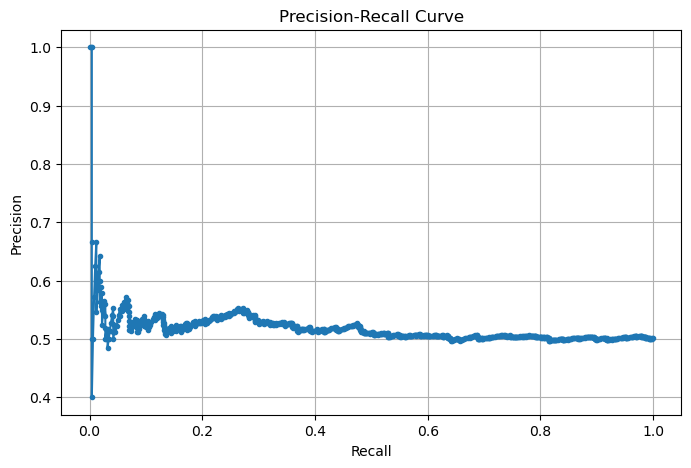

In [50]:
# 3. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker=".")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()


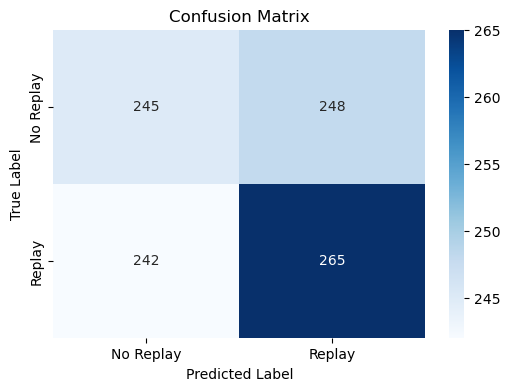

In [44]:
# 2. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Replay", "Replay"], yticklabels=["No Replay", "Replay"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

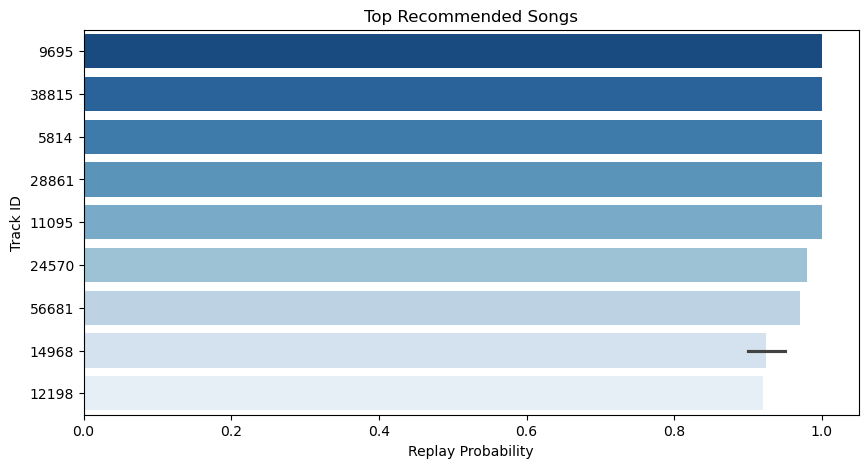

In [57]:
# 1. Bar Chart - Top Recommended Songs
plt.figure(figsize=(10, 5))
sns.barplot(x="Replay Probability", y="Track", data=top_songs, palette="Blues_r")
plt.xlabel("Replay Probability")
plt.ylabel("Track ID")
plt.title("Top Recommended Songs")
plt.show()
import warnings
warnings.filterwarnings("ignore")
